In [2]:
import os
os.sys.path.append("../")
from scripts.visualisation import *

In [3]:
spark = (
    SparkSession.builder.appName("Visualisation Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "2g")
    .getOrCreate()
)

24/10/17 12:29:57 WARN Utils: Your hostname, DESKTOP-H6V94HM resolves to a loopback address: 127.0.1.1; using 192.168.0.220 instead (on interface eth0)
24/10/17 12:29:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/17 12:29:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
path = "../data/curated"

In [5]:
merchant_profitability = spark.read.parquet(f"{path}/merchant_profitability.parquet")
merchant_info = spark.read.parquet(f"{path}/merchant_info.parquet")

In [6]:
# Merging the data
merchant_profitability = merchant_profitability.join(merchant_info, on = ['merchant_abn'], how = "inner")

In [7]:
merchant_profitability

merchant_abn,total_commission,total_revenue,average_order_value,total_orders,merchant_avg_fp,consumer_avg_fp,name,category,revenue_level,take_rate
90543168331,213472.01580529273,7965373.724078093,257.454142799641,30939,NULL,14.725798357376298,Phasellus Dapibus...,"furniture, home f...",c,2.68
17739089622,47059.99916389664,939321.3405967394,59.48083463758482,15792,NULL,15.615259675176652,Auctor Quis Corp.,"cable, satellite,...",b,5.01
31585975447,37675.49464086313,1207547.905155869,70.37402559332531,17159,NULL,16.031956390139737,Dolor Dapibus Gra...,digital goods: bo...,b,3.12
27504885147,24130.27229652096,501668.86271353345,91.99869112663367,5453,NULL,15.322902573618922,Enim Ltd,"gift, card, novel...",b,4.81
71787414647,24286.595584089268,401431.3319684177,173.1800396757626,2318,NULL,19.85847625452776,Aliquam Arcu Indu...,"furniture, home f...",a,6.05
72738688428,70176.78011018947,1237685.7162290916,166.4227129526814,7437,NULL,14.38092487969379,Donec Tempor Corp.,"books, periodical...",a,5.67
75104340635,16005.477751460527,592795.4722763158,98.86515548304132,5996,NULL,16.880769589094736,Nisl Elementum Ltd,health and beauty...,c,2.7
39685893174,4118.987500630807,735533.482255501,406.5967287205644,1809,NULL,13.226394458848414,Nec Eleifend Non ...,"books, periodical...",d,0.56
60470122582,10642.853481469836,215007.14103979463,1791.726175331622,120,NULL,12.54198995441312,Consequat Purus I...,telecom,b,4.95
97603729191,87822.23469593289,1295313.1961052045,758.3800913964898,1708,NULL,12.051349345373305,Eu Company,"stationery, offic...",a,6.78


# Visualisation 

In this notebook plot graphs to get understanding of distributions of revenue levels 

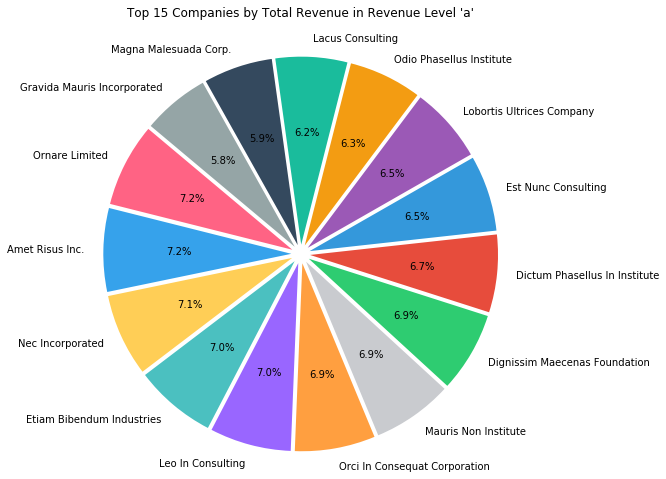

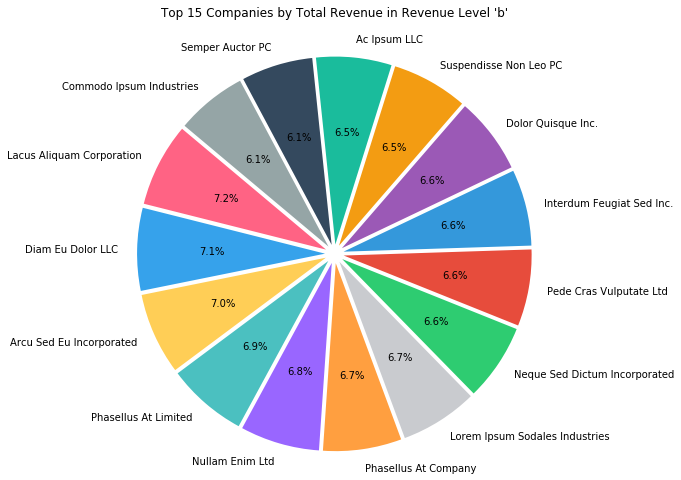

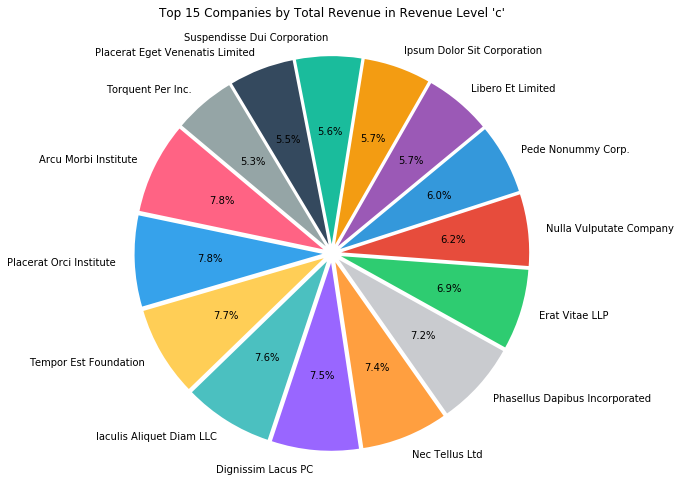

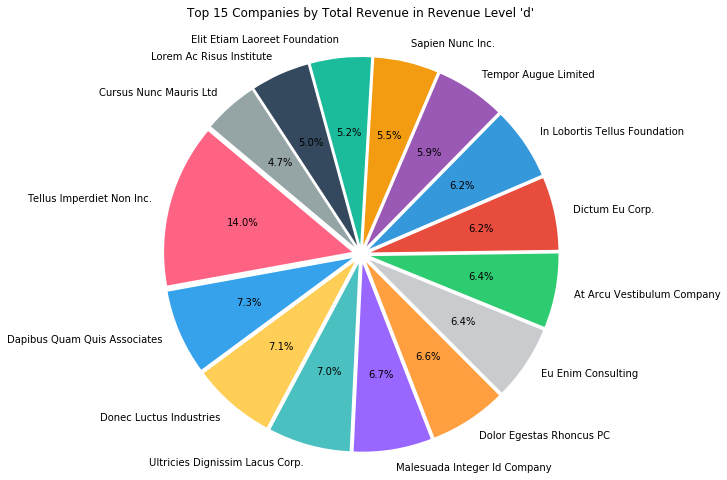

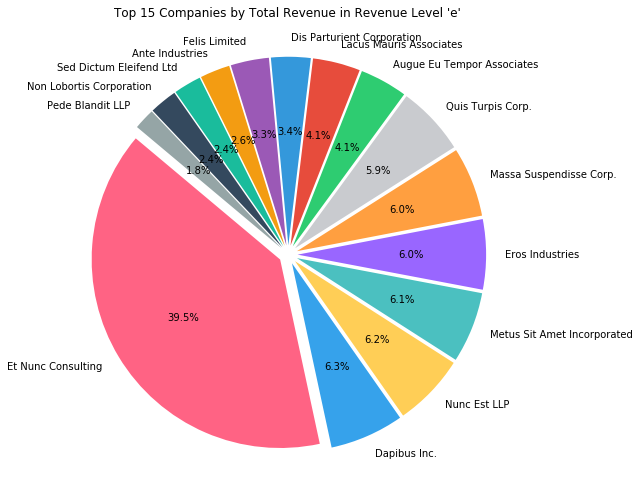

In [8]:

# Define revenue levels
revenue_levels = ['a', 'b', 'c', 'd', 'e']

# Loop through each revenue level
for level in revenue_levels:
    # Filter for the current revenue level
    revenue_level_df = merchant_profitability.filter(F.col("revenue_level") == level)
    
    # Group by company name and calculate the total revenue
    merchant_revenue = revenue_level_df.groupBy("name").agg(F.sum("total_revenue").alias("total_revenue"))
    
    # Sort by total revenue and select the top N companies (e.g., top 15)
    top_n_merchants = merchant_revenue.orderBy(F.desc("total_revenue")).limit(15).toPandas()
    
    # Call the function to plot the pie chart
    plot_top_merchants_pie(top_n_merchants, level)


We can see that from revenue level A to D, the top 15 merchants have approximately the same revenue level where as in revenue level E, Et Nunc Consulting seems to make up a large portion of the level's revenue. 

In [9]:
merchant_profitability

merchant_abn,total_commission,total_revenue,average_order_value,total_orders,merchant_avg_fp,consumer_avg_fp,name,category,revenue_level,take_rate
90543168331,213472.01580529273,7965373.724078093,257.454142799641,30939,NULL,14.725798357376298,Phasellus Dapibus...,"furniture, home f...",c,2.68
17739089622,47059.99916389664,939321.3405967394,59.48083463758482,15792,NULL,15.615259675176652,Auctor Quis Corp.,"cable, satellite,...",b,5.01
31585975447,37675.49464086313,1207547.905155869,70.37402559332531,17159,NULL,16.031956390139737,Dolor Dapibus Gra...,digital goods: bo...,b,3.12
27504885147,24130.27229652096,501668.86271353345,91.99869112663367,5453,NULL,15.322902573618922,Enim Ltd,"gift, card, novel...",b,4.81
71787414647,24286.595584089268,401431.3319684177,173.1800396757626,2318,NULL,19.85847625452776,Aliquam Arcu Indu...,"furniture, home f...",a,6.05
72738688428,70176.78011018947,1237685.7162290916,166.4227129526814,7437,NULL,14.38092487969379,Donec Tempor Corp.,"books, periodical...",a,5.67
75104340635,16005.477751460527,592795.4722763158,98.86515548304132,5996,NULL,16.880769589094736,Nisl Elementum Ltd,health and beauty...,c,2.7
39685893174,4118.987500630807,735533.482255501,406.5967287205644,1809,NULL,13.226394458848414,Nec Eleifend Non ...,"books, periodical...",d,0.56
60470122582,10642.853481469836,215007.14103979463,1791.726175331622,120,NULL,12.54198995441312,Consequat Purus I...,telecom,b,4.95
97603729191,87822.23469593289,1295313.1961052045,758.3800913964898,1708,NULL,12.051349345373305,Eu Company,"stationery, offic...",a,6.78


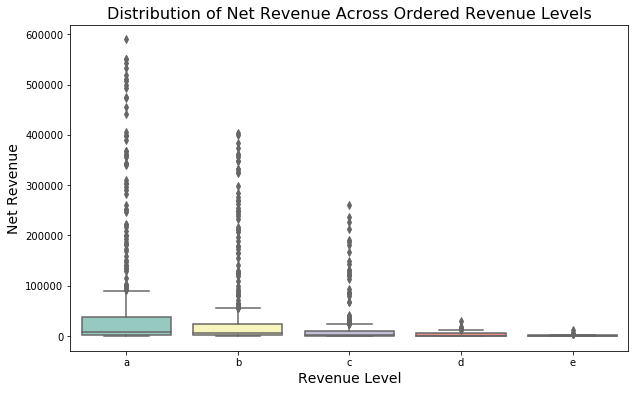

In [10]:

# Convert the Spark DataFrame to Pandas for visualization
merchant_profitability_pd = merchant_profitability.select("revenue_level", "total_commission").toPandas()

# Ensure that the revenue levels are ordered from 'a' to 'e'
ordered_levels = ['a', 'b', 'c', 'd', 'e']
merchant_profitability_pd['revenue_level'] = pd.Categorical(merchant_profitability_pd['revenue_level'], 
                                                           categories=ordered_levels, 
                                                           ordered=True)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the box plot using seaborn with the specified order
sns.boxplot(x="revenue_level", y="total_commission", data=merchant_profitability_pd, 
            palette="Set3", order=ordered_levels)

# Set the plot's title and labels
plt.title("Distribution of Net Revenue Across Ordered Revenue Levels", fontsize=16)
plt.xlabel("Revenue Level", fontsize=14)
plt.ylabel("Net Revenue", fontsize=14)

# Show the plot
plt.savefig("../plots/boxplot_net_revenue")
plt.show()

In [10]:
merchant_profitability.show()

+------------+------------------+------------------+-------------------+------------+---------------+------------------+--------------------+--------------------+-------------+---------+
|merchant_abn|  total_commission|     total_revenue|average_order_value|total_orders|merchant_avg_fp|   consumer_avg_fp|                name|            category|revenue_level|take_rate|
+------------+------------------+------------------+-------------------+------------+---------------+------------------+--------------------+--------------------+-------------+---------+
| 90543168331|213472.01580529273| 7965373.724078093|   257.454142799641|       30939|           NULL|14.725798357376298|Phasellus Dapibus...|furniture, home f...|            c|     2.68|
| 17739089622| 47059.99916389664| 939321.3405967394|  59.48083463758482|       15792|           NULL|15.615259675176652|   Auctor Quis Corp.|cable, satellite,...|            b|     5.01|
| 31585975447| 37675.49464086313| 1207547.905155869|  70.37402559

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


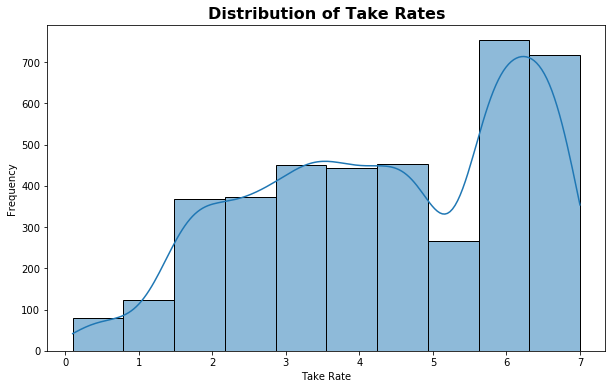

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
# Assuming 'merchant_profitability' is your PySpark DataFrame
merchant_profitability_pandas = merchant_profitability.select('take_rate').toPandas()

# Plotting the take rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(merchant_profitability_pandas['take_rate'], bins=10, kde=True)
plt.title('Distribution of Take Rates', size = 16, fontweight='bold')
plt.xlabel('Take Rate')
plt.ylabel('Frequency')
plt.savefig("../plots/take_rate_distribution")
plt.show()

